In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [3]:
train.shape

(175296, 18)

In [4]:
train.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [5]:
train.duplicated().sum()

0

In [6]:
test = pd.read_csv('test.csv')
test.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


In [7]:
test.shape

(17520, 18)

In [8]:
test.isnull().sum()

Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Cloud Type                0
Dew Point                 0
Temperature               0
Pressure                  0
Relative Humidity         0
Solar Zenith Angle        0
Precipitable Water        0
Wind Direction            0
Wind Speed                0
Fill Flag                 0
Clearsky DHI          17520
Clearsky DNI          17520
Clearsky GHI          17520
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind Direction      175296 non-nul

In [10]:
train[train['Hour'] == 9].head(5)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
18,2009,1,1,9,0,0,0,0,0,-1.0,0.0,1010,88.32,134.92,0.541,49.8,2.2,0
19,2009,1,1,9,30,0,0,0,0,-1.0,0.0,1010,88.33,128.56,0.544,49.8,2.2,0
66,2009,1,2,9,0,0,0,0,4,4.0,5.0,1000,100.00,134.99,2.134,158.2,1.6,0
67,2009,1,2,9,30,0,0,0,3,4.0,5.0,1000,100.00,128.63,2.176,158.2,1.4,0
114,2009,1,3,9,0,0,0,0,1,11.0,12.0,1000,100.00,135.05,2.646,222.3,1.6,0


Text(0, 0.5, 'Clearsky DNI')

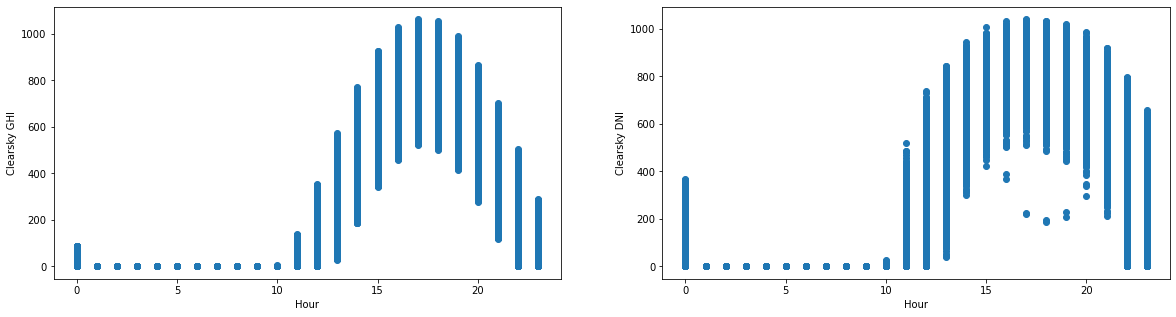

In [11]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(train['Hour'], train['Clearsky GHI'])
ax1.set_xlabel('Hour')
ax1.set_ylabel('Clearsky GHI')
ax2.scatter(train['Hour'], train['Clearsky DNI'])
ax2.set_xlabel('Hour')
ax2.set_ylabel('Clearsky DNI')

Text(0, 0.5, 'Clearsky DHI')

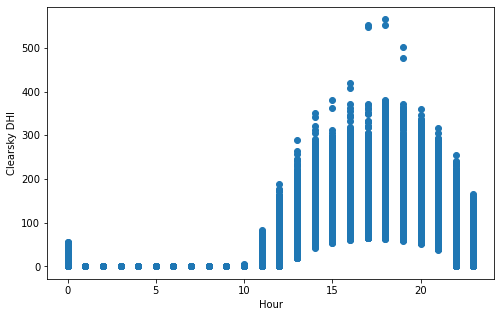

In [12]:
plt.figure(figsize= (8, 5))
plt.scatter(train['Hour'], train['Clearsky DHI'])
plt.xlabel('Hour')
plt.ylabel('Clearsky DHI')

In [13]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(192816, 18)

In [14]:
combined['pro_unit'] = combined['Temperature'] / combined['Relative Humidity']
combined['volume'] = combined['Temperature'] / combined['Pressure']

In [15]:
newtrain = combined.iloc[0:175296, :]
newtest = combined.iloc[175296: , :]
print(newtrain.shape)
print(newtest.shape)

(175296, 20)
(17520, 20)


{'whiskers': [<matplotlib.lines.Line2D at 0x22309a25d00>,
 'caps': [<matplotlib.lines.Line2D at 0x22309a30400>,
 'boxes': [<matplotlib.lines.Line2D at 0x22309a259a0>],
 'medians': [<matplotlib.lines.Line2D at 0x22309a30ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22309a30e20>],
 'means': []}

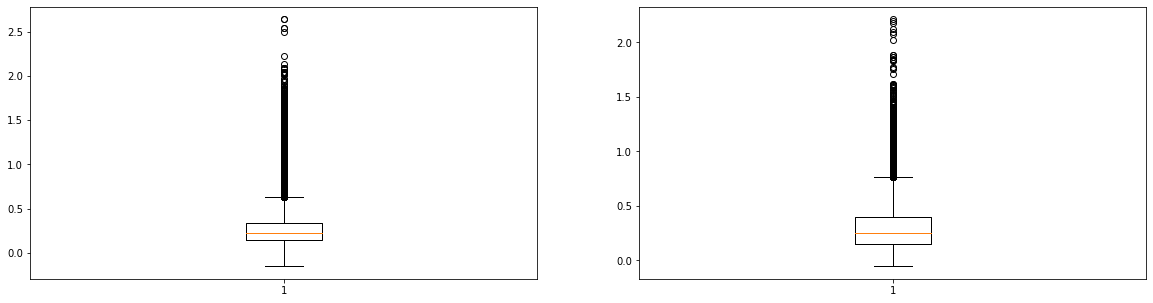

In [16]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtrain['pro_unit'])
ax2.boxplot(newtest['pro_unit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22309ad89a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22309ae30a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22309ad8640>],
 'medians': [<matplotlib.lines.Line2D at 0x22309ae3760>],
 'fliers': [<matplotlib.lines.Line2D at 0x22309ae3ac0>],
 'means': []}

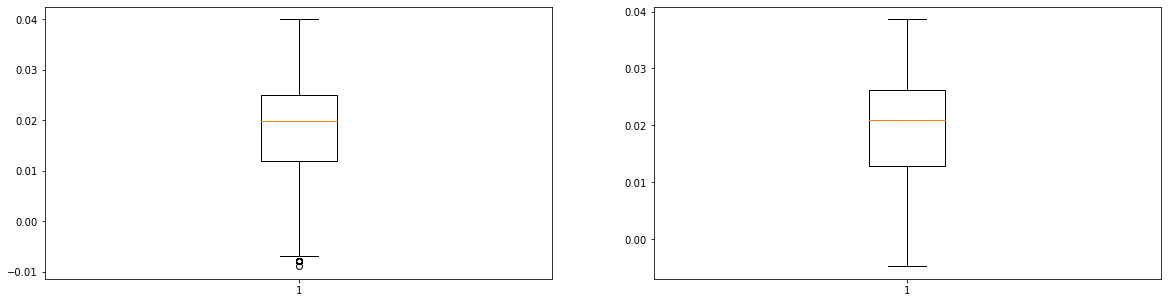

In [17]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtrain['volume'])
ax2.boxplot(newtest['volume'])

In [18]:
newtest = newtest.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'], axis = 1)
newtest.shape

(17520, 17)

In [19]:
newtrain.shape

(175296, 20)

In [22]:
x = newtrain.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'],axis=1)
y = newtrain['Clearsky DHI']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=101)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [32]:
model = Sequential()
model.add(Dense(19, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

In [33]:
model.compile(optimizer = 'adam', loss = 'mse')

In [34]:
model.fit(x_train, y_train.values, validation_data = (x_test, y_test.values), epochs = 15)

Epoch 1/15
3835/3835 [==============================] - 7s 2ms/step - loss: 1496.4172 - val_loss: 539.2921
Epoch 2/15
3835/3835 [==============================] - 7s 2ms/step - loss: 479.1811 - val_loss: 432.3646
Epoch 3/15
3835/3835 [==============================] - 7s 2ms/step - loss: 424.6712 - val_loss: 397.6006
Epoch 4/15
3835/3835 [==============================] - 7s 2ms/step - loss: 376.3507 - val_loss: 346.2864
Epoch 5/15
3835/3835 [==============================] - 7s 2ms/step - loss: 337.3230 - val_loss: 318.7604
Epoch 6/15
3835/3835 [==============================] - 7s 2ms/step - loss: 317.5364 - val_loss: 306.7423
Epoch 7/15
3835/3835 [==============================] - 7s 2ms/step - loss: 306.7545 - val_loss: 301.1446
Epoch 8/15
3835/3835 [==============================] - 7s 2ms/step - loss: 300.7744 - val_loss: 296.5498
Epoch 9/15
3835/3835 [==============================] - 7s 2ms/step - loss: 296.7953 - val_loss: 295.3138
Epoch 10/15
3835/3835 [======================

<AxesSubplot:>

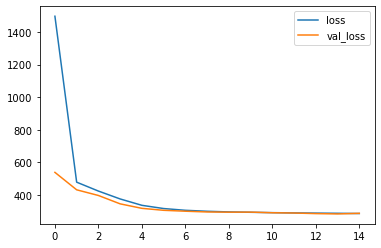

In [35]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
predictions = model.predict(x_test)

In [39]:
mean_squared_error(y_test,predictions)

288.26837768897155

In [40]:
x = newtrain.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'],axis=1)
y = newtrain['Clearsky DNI']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=101)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [43]:
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [50]:
model = Sequential()
model.add(Dense(19, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

In [51]:
model.compile(optimizer = 'adam', loss = 'mse')

In [52]:
model.fit(x_train, y_train.values, validation_data = (x_test, y_test.values), epochs = 25)

Epoch 1/25
3835/3835 [==============================] - 8s 2ms/step - loss: 72257.4219 - val_loss: 22368.3867
Epoch 2/25
3835/3835 [==============================] - 7s 2ms/step - loss: 18432.8027 - val_loss: 14972.4395
Epoch 3/25
3835/3835 [==============================] - 7s 2ms/step - loss: 13777.7764 - val_loss: 12499.1445
Epoch 4/25
3835/3835 [==============================] - 7s 2ms/step - loss: 12350.0020 - val_loss: 11920.0840
Epoch 5/25
3835/3835 [==============================] - 7s 2ms/step - loss: 11926.9062 - val_loss: 11709.8496
Epoch 6/25
3835/3835 [==============================] - 7s 2ms/step - loss: 11670.2070 - val_loss: 11528.5400
Epoch 7/25
3835/3835 [==============================] - 7s 2ms/step - loss: 11452.2637 - val_loss: 11477.9131
Epoch 8/25
3835/3835 [==============================] - 7s 2ms/step - loss: 11265.7812 - val_loss: 11064.3789
Epoch 9/25
3835/3835 [==============================] - 7s 2ms/step - loss: 11103.1035 - val_loss: 10998.2764
Epoch 10/2

<AxesSubplot:>

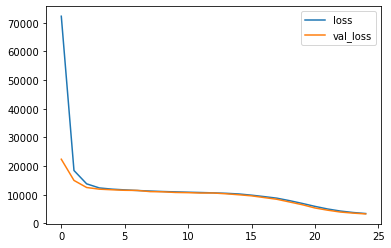

In [53]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
predictions = model.predict(x_test)

In [56]:
mean_squared_error(y_test,predictions)

3284.297547954951

In [57]:
x = newtrain.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'],axis=1)
y = newtrain['Clearsky GHI']

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=101)

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [60]:
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [62]:
model = Sequential()
model.add(Dense(19, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

In [63]:
model.compile(optimizer = 'adam', loss = 'mse')

In [64]:
model.fit(x_train, y_train.values, validation_data = (x_test, y_test.values), epochs = 15)

Epoch 1/15
3835/3835 [==============================] - 8s 2ms/step - loss: 45919.4922 - val_loss: 11743.9561
Epoch 2/15
3835/3835 [==============================] - 8s 2ms/step - loss: 6652.7207 - val_loss: 3049.7039
Epoch 3/15
3835/3835 [==============================] - 7s 2ms/step - loss: 2225.8884 - val_loss: 1726.6609
Epoch 4/15
3835/3835 [==============================] - 8s 2ms/step - loss: 1505.8285 - val_loss: 1292.6041
Epoch 5/15
3835/3835 [==============================] - 7s 2ms/step - loss: 1181.3225 - val_loss: 1076.7692
Epoch 6/15
3835/3835 [==============================] - 8s 2ms/step - loss: 1032.7877 - val_loss: 1072.9266
Epoch 7/15
3835/3835 [==============================] - 7s 2ms/step - loss: 980.3528 - val_loss: 983.6737
Epoch 8/15
3835/3835 [==============================] - 7s 2ms/step - loss: 959.9798 - val_loss: 948.4622
Epoch 9/15
3835/3835 [==============================] - 7s 2ms/step - loss: 953.9456 - val_loss: 952.0817
Epoch 10/15
3835/3835 [=========

<AxesSubplot:>

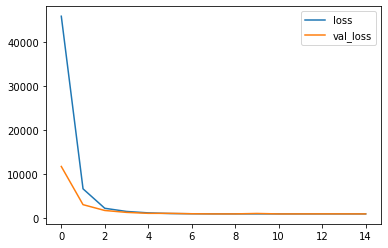

In [65]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
predictions = model.predict(x_test)

In [68]:
mean_squared_error(y_test,predictions)

944.5991030341663

In [103]:
x_train = newtrain.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'],axis=1)
y_train = newtrain['Clearsky DHI']
x_test = newtest

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [105]:
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [107]:
model = Sequential()
model.add(Dense(19, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

In [108]:
model.compile(optimizer = 'adam', loss = 'mse')

In [109]:
model.fit(x_train, y_train.values, epochs = 15)

Epoch 1/15
5478/5478 [==============================] - ETA: 0s - loss: 1377.58 - 7s 1ms/step - loss: 1377.2006
Epoch 2/15
5478/5478 [==============================] - 7s 1ms/step - loss: 446.8907
Epoch 3/15
5478/5478 [==============================] - 7s 1ms/step - loss: 362.4648
Epoch 4/15
5478/5478 [==============================] - 7s 1ms/step - loss: 326.7456
Epoch 5/15
5478/5478 [==============================] - 7s 1ms/step - loss: 311.5324
Epoch 6/15
5478/5478 [==============================] - 7s 1ms/step - loss: 303.4406
Epoch 7/15
5478/5478 [==============================] - 7s 1ms/step - loss: 298.2996
Epoch 8/15
5478/5478 [==============================] - 7s 1ms/step - loss: 294.6280
Epoch 9/15
5478/5478 [==============================] - 7s 1ms/step - loss: 292.0471
Epoch 10/15
5478/5478 [==============================] - 7s 1ms/step - loss: 289.7513
Epoch 11/15
5478/5478 [==============================] - 7s 1ms/step - loss: 287.6996
Epoch 12/15
5478/5478 [=============

In [110]:
predictions1 = model.predict(x_test)

In [111]:
x_train = newtrain.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'],axis=1)
y_train = newtrain['Clearsky DNI']
x_test = newtest

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [113]:
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [115]:
model = Sequential()
model.add(Dense(19, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

In [116]:
model.compile(optimizer = 'adam', loss = 'mse')

In [117]:
model.fit(x_train, y_train.values, epochs = 25)

Epoch 1/25
5478/5478 [==============================] - 7s 1ms/step - loss: 56161.6406
Epoch 2/25
5478/5478 [==============================] - 7s 1ms/step - loss: 14046.1543
Epoch 3/25
5478/5478 [==============================] - 7s 1ms/step - loss: 8683.2607
Epoch 4/25
5478/5478 [==============================] - 7s 1ms/step - loss: 6134.4937
Epoch 5/25
5478/5478 [==============================] - 7s 1ms/step - loss: 4598.2856
Epoch 6/25
5478/5478 [==============================] - 7s 1ms/step - loss: 3618.5940
Epoch 7/25
5478/5478 [==============================] - 7s 1ms/step - loss: 3020.5212
Epoch 8/25
5478/5478 [==============================] - 7s 1ms/step - loss: 2666.6858
Epoch 9/25
5478/5478 [==============================] - 7s 1ms/step - loss: 2370.0806
Epoch 10/25
5478/5478 [==============================] - 7s 1ms/step - loss: 2164.6238
Epoch 11/25
5478/5478 [==============================] - 7s 1ms/step - loss: 2049.3464
Epoch 12/25
5478/5478 [===========================

In [118]:
predictions2 = model.predict(x_test)

In [119]:
x_train = newtrain.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'],axis=1)
y_train = newtrain['Clearsky GHI']
x_test = newtest

In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [121]:
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [123]:
model = Sequential()
model.add(Dense(19, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

In [124]:
model.compile(optimizer = 'adam', loss = 'mse')

In [125]:
model.fit(x_train, y_train.values, epochs = 15)

Epoch 1/15
5478/5478 [==============================] - 7s 1ms/step - loss: 46651.9180
Epoch 2/15
5478/5478 [==============================] - 7s 1ms/step - loss: 4844.5845
Epoch 3/15
5478/5478 [==============================] - 7s 1ms/step - loss: 1792.7671
Epoch 4/15
5478/5478 [==============================] - 7s 1ms/step - loss: 1182.4026
Epoch 5/15
5478/5478 [==============================] - 7s 1ms/step - loss: 863.8604
Epoch 6/15
5478/5478 [==============================] - 7s 1ms/step - loss: 699.8318
Epoch 7/15
5478/5478 [==============================] - 7s 1ms/step - loss: 545.9903
Epoch 8/15
5478/5478 [==============================] - 7s 1ms/step - loss: 372.1054
Epoch 9/15
5478/5478 [==============================] - 7s 1ms/step - loss: 259.3710
Epoch 10/15
5478/5478 [==============================] - 8s 1ms/step - loss: 198.2987
Epoch 11/15
5478/5478 [==============================] - 8s 1ms/step - loss: 171.4434
Epoch 12/15
5478/5478 [==============================] - 7

In [126]:
predictions3 = model.predict(x_test)

In [131]:
solution = pd.DataFrame({'Clearsky DHI' : predictions1.flatten(), 'Clearsky DNI' : predictions2.flatten(), 'Clearsky GHI' : predictions3.flatten()})
solution.shape

(17520, 3)

In [132]:
solution.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0.541086,0.017802,0.728261
1,0.944163,0.017802,0.623769
2,0.840796,0.017802,0.475240
3,0.907870,0.017802,0.425496
4,0.848189,0.017802,0.218038


In [138]:
solution.to_csv('ANN.csv', index = False)